In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    #importing the libraries required

In [2]:
df=pd.read_csv("advertising.csv")#loading the dataset

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
#hence there are no null values

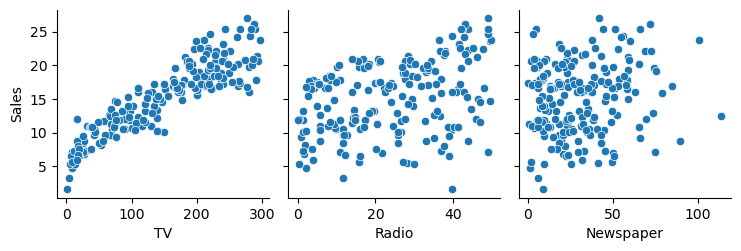

In [11]:
#data visualisation
#plotting pair plot for the tv,radio and newspaper for their corresponding sales
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

In [12]:
#we can see that for tv ads their is observable increase in the sales
#but for radio and newspaper ads it is not that much clear

In [17]:
a = df.corr()
b = a.loc['Sales', ['TV', 'Newspaper', 'Radio']]
b

TV           0.901208
Newspaper    0.157960
Radio        0.349631
Name: Sales, dtype: float64

In [18]:
#here we can more clearly see that tv ads are bringing a significant increase in the sale 
#as the correlation between them is nearly equal to 1

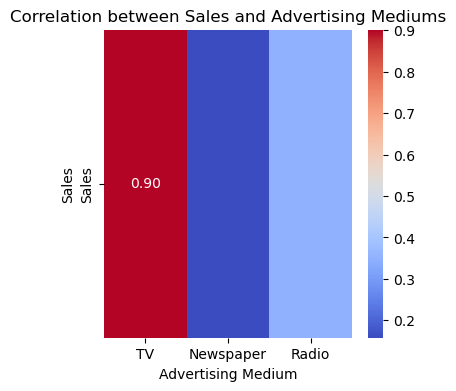

In [23]:
#plotting the heatmap for the correlation
heatmap_data = b.values.reshape(1, -1)
plt.figure(figsize=(4, 4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=['TV', 'Newspaper', 'Radio'], yticklabels=['Sales'])
plt.title('Correlation between Sales and Advertising Mediums')
plt.xlabel('Advertising Medium')
plt.ylabel('Sales')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
# Splitting data into features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)   #r2_score near to 1 indicates that it is a perfect fit

Mean Squared Error: 2.907756910271091
R-squared Score: 0.9059011844150826


HERE SINCE WE WERE GETTING THAT TV AND SALES WERE HIGHLY CORRELATED SO I JUST USED ONLY TV 
AND SALES TO TRAIN AND PREDICT THE MODEL

In [30]:

# Splitting data into features (X) and target variable (y)
X = df[['TV']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

#r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Squared Error: 6.101072906773964
R-squared Score: 0.802561303423698
